In [110]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.math import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [111]:
def read_pkl( path ):
    with open( path, "rb" ) as f:
        model = pickle.load( f )
    return model

def most_likely_index(pre_list):
    answer = np.empty(len(pre_list), dtype='int32')
    for i, val in enumerate(pre_list):
        answer[i] = np.argmax(val)
    return answer

def img_reshape(img_list):
    new_image = np.empty((len(img_list), 64, 64), dtype='uint8')
    for i, _ in enumerate(img_list):
        new_image[i] = cv2.resize(img_list[i], dsize=(64, 64))
    return new_image

def data_reshape(x):
    x = x.astype('float32')
    x = x / 255.0
    return x

def plot_acc( ac, val_ac ):
    plt.plot( ac )
    plt.plot( val_ac )
    plt.title('epochs-accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Test'])
    plt.show()

def plot_loss( loss, val_loss ):
    plt.plot( loss )
    plt.plot( val_loss )
    plt.title('epochs-loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['loss', 'validation_loss'])
    plt.show()

def heat_map(matrix):
    plt.figure(figsize = (10,7))
    sns.heatmap(matrix, annot=True, fmt='2d', cmap='Reds')
    plt.show()

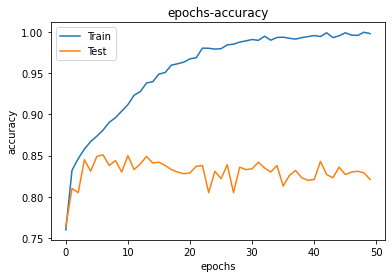

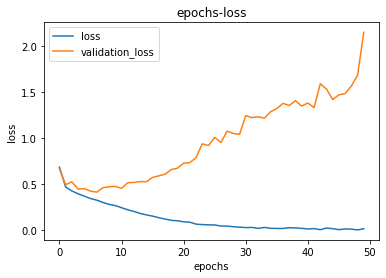

In [3]:
model = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

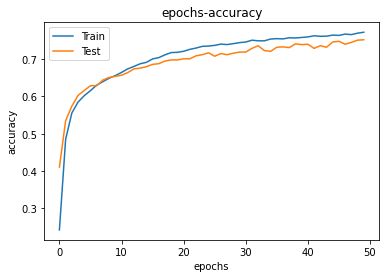

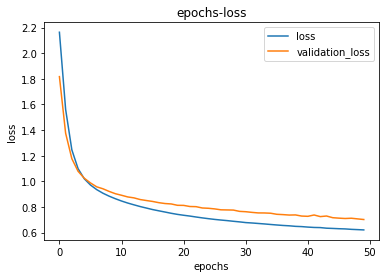

In [4]:
model = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50-conv×1.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

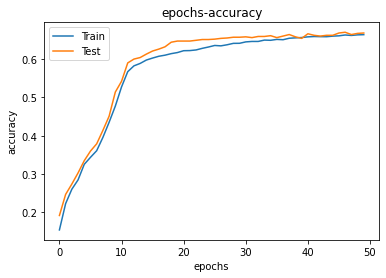

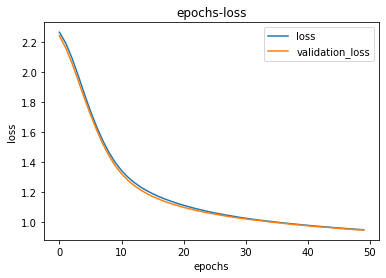

In [5]:
model = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50-conv×2.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

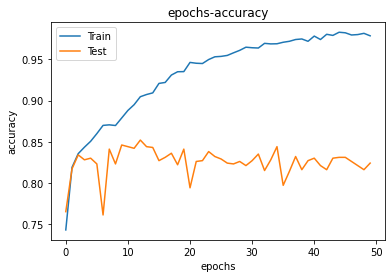

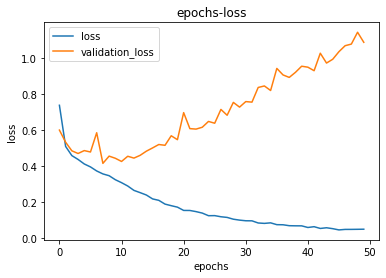

In [6]:
model = read_pkl('./Results/NN/history/NN=100×5-dropout×1-data=6000-epochs=50.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

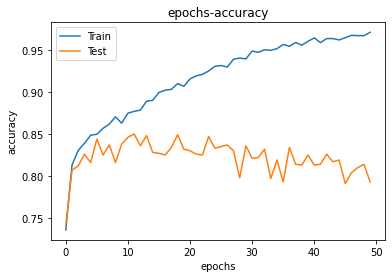

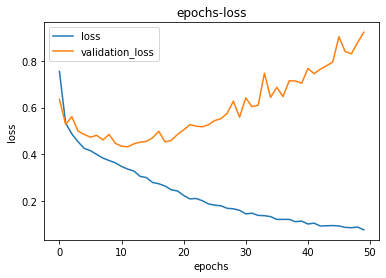

In [7]:
model = read_pkl('./Results/NN/history/NN=100×5-dropout×2-data=6000-epochs=50.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

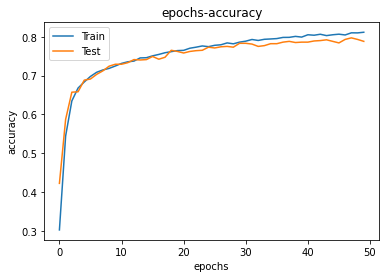

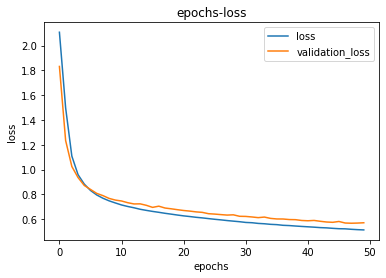

In [8]:
model = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50-conv×2_model=2.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

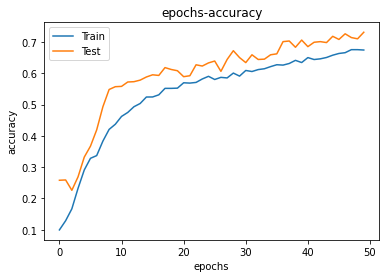

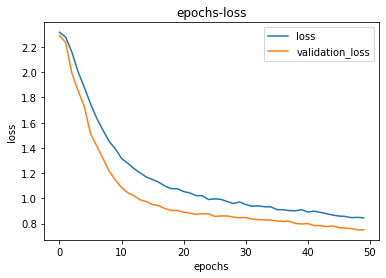

In [9]:
model = read_pkl('./Results/NN/history/NN=100×5-dropout×5-data=6000-epochs=50-conv×1.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

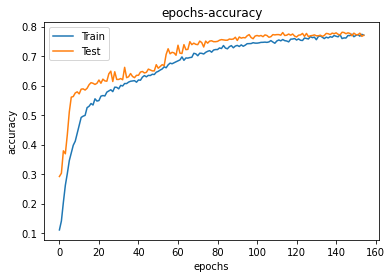

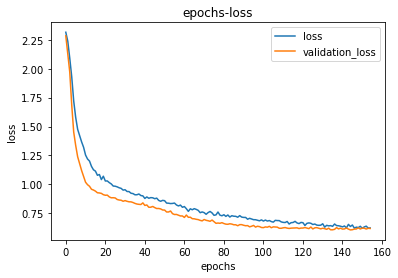

In [11]:
model = read_pkl('./Results/NN/history/NN=100×5-dropout×5-data=6000-epochs=200-conv×1.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

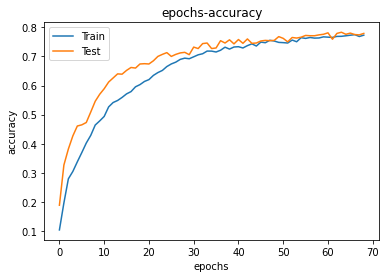

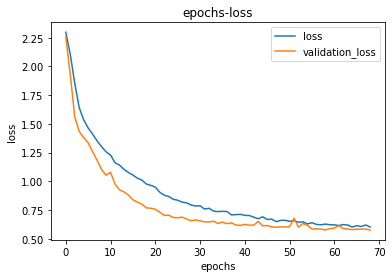

In [13]:
model = read_pkl('./Results/NN/history/NN=100×5-dropout×5-data=6000-epochs=200-conv×3.pkl')
plot_acc( model["accuracy"], model["val_accuracy"] )
plot_loss( model["loss"], model["val_loss"] )

In [120]:
random_state = 60

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_num = len(class_names)

(x_train, y_train), (x_test, y_test) = load_data()


x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=random_state)
vertification_train, x_test, vertification_test, y_test = train_test_split(x_test, y_test, test_size=0.1, random_state=random_state)
_, vertification_train, _, vertification_test = train_test_split(vertification_train, vertification_test, test_size=100, random_state=random_state)

x_train = data_reshape(x_train)
x_test = data_reshape(x_test)
vertification_train = data_reshape(vertification_train)

# one-hot表現に変換
y_train = to_categorical( y_train, class_num )
y_test = to_categorical( y_test, class_num )
vertification_test = to_categorical( vertification_test, class_num )

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
dense_34 (Dense)             (None, 28, 28, 100)       200       
_________________________________________________________________
dense_35 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_36 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_37 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_38 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
flatten_18 (Flatten)         (None, 78400)           

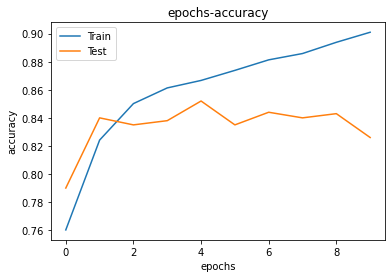

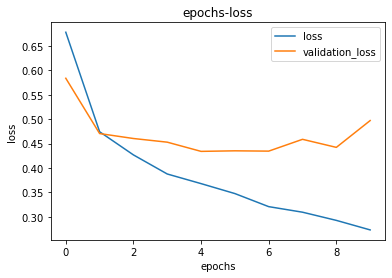

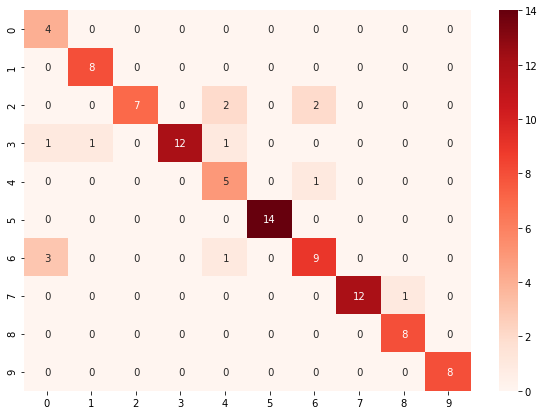

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       1.00      0.89      0.94         9
           2       0.64      1.00      0.78         7
           3       0.80      1.00      0.89        12
           4       0.83      0.56      0.67         9
           5       1.00      1.00      1.00        14
           6       0.69      0.75      0.72        12
           7       0.92      1.00      0.96        12
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         8

    accuracy                           0.87       100
   macro avg       0.89      0.86      0.86       100
weighted avg       0.89      0.87      0.87       100



In [113]:
def create_model(class_num):
    model = Input( shape=(28, 28, 1) )
    x = Dense(100, activation="relu")(model)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Flatten()(x)
    output = Dense(class_num, activation="softmax")(x)
    return Model( inputs=model, outputs=output )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/NN=100×5-data=6000-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/NN=100×5-data=6000.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
dense_52 (Dense)             (None, 28, 28, 100)       200       
_________________________________________________________________
dense_53 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_54 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_55 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_56 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
flatten_26 (Flatten)         (None, 78400)           

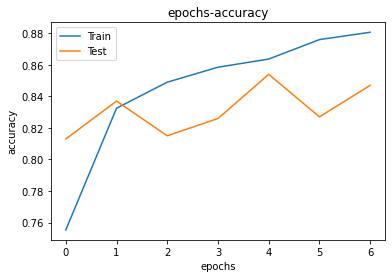

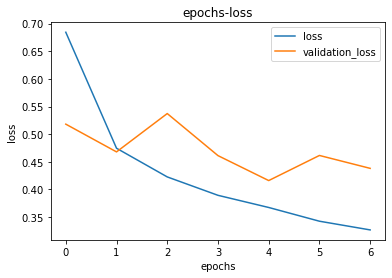

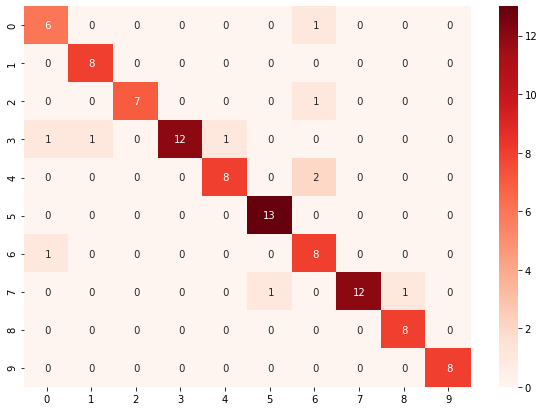

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.89      0.94         9
           2       0.88      1.00      0.93         7
           3       0.80      1.00      0.89        12
           4       0.80      0.89      0.84         9
           5       1.00      0.93      0.96        14
           6       0.89      0.67      0.76        12
           7       0.86      1.00      0.92        12
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         8

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



In [122]:
def create_model(class_num):
    model = Input( shape=(28, 28, 1) )
    x = Dense(100, activation="relu")(model)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Flatten()(x)
    output = Dense(class_num, activation="softmax")(x)
    return Model( inputs=model, outputs=output )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/NN=100×5-data=6000-epochs=7-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=7.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))

Model: "functional_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
dense_58 (Dense)             (None, 28, 28, 100)       200       
_________________________________________________________________
dense_59 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_60 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_61 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
dense_62 (Dense)             (None, 28, 28, 100)       10100     
_________________________________________________________________
flatten_27 (Flatten)         (None, 78400)           

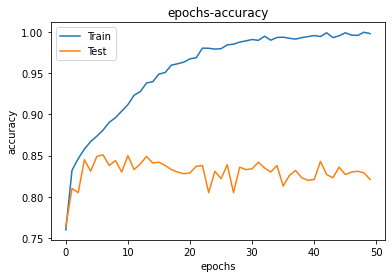

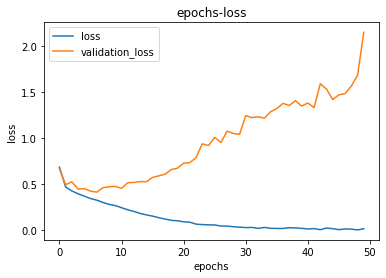

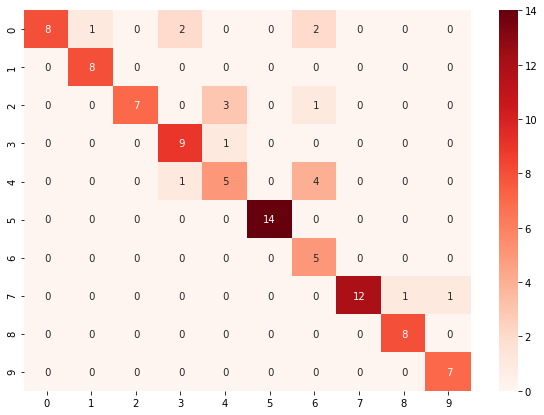

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.89      0.94         9
           2       0.64      1.00      0.78         7
           3       0.90      0.75      0.82        12
           4       0.50      0.56      0.53         9
           5       1.00      1.00      1.00        14
           6       1.00      0.42      0.59        12
           7       0.86      1.00      0.92        12
           8       1.00      0.89      0.94         9
           9       1.00      0.88      0.93         8

    accuracy                           0.83       100
   macro avg       0.85      0.84      0.82       100
weighted avg       0.87      0.83      0.83       100



In [123]:
def create_model(class_num):
    model = Input( shape=(28, 28, 1) )
    x = Dense(100, activation="relu")(model)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Dense(100, activation="relu")(x)
    x = Flatten()(x)
    output = Dense(class_num, activation="softmax")(x)
    return Model( inputs=model, outputs=output )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/NN=100×5-data=6000-epochs=50-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 1)           0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 660
Trainable params: 660
Non-trainable params: 0
_________________________________________________________________


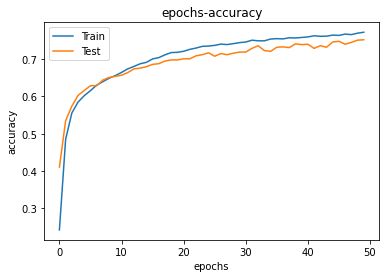

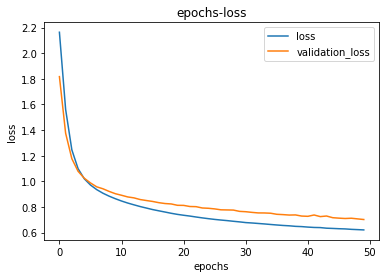

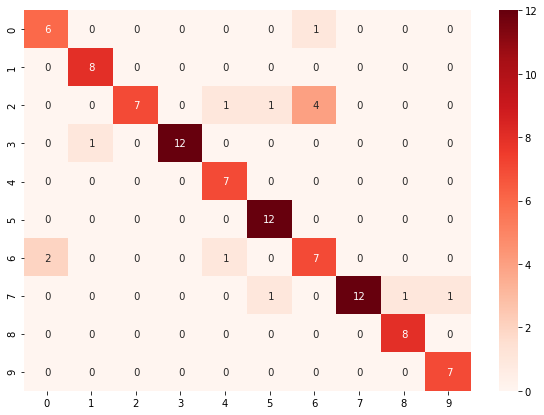

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.89      0.94         9
           2       0.54      1.00      0.70         7
           3       0.92      1.00      0.96        12
           4       1.00      0.78      0.88         9
           5       1.00      0.86      0.92        14
           6       0.70      0.58      0.64        12
           7       0.80      1.00      0.89        12
           8       1.00      0.89      0.94         9
           9       1.00      0.88      0.93         8

    accuracy                           0.86       100
   macro avg       0.88      0.86      0.86       100
weighted avg       0.89      0.86      0.86       100



In [115]:
def create_model(class_num):
    model = Input( shape=(28, 28, 1) )
    x = Conv2D(1, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))(model)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Flatten()(x)
    output = Dense(class_num, activation="softmax")(x)
    return Model( inputs=model, outputs=output )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/NN=100×5-data=6000-epochs=50-conv×1-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50-conv×1.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 8)           1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

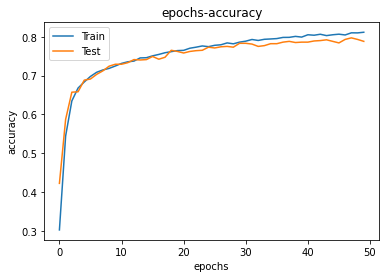

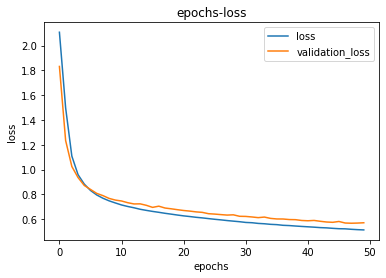

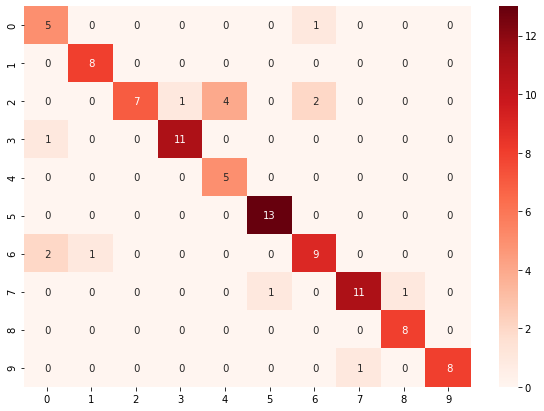

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       1.00      0.89      0.94         9
           2       0.50      1.00      0.67         7
           3       0.92      0.92      0.92        12
           4       1.00      0.56      0.71         9
           5       1.00      0.93      0.96        14
           6       0.75      0.75      0.75        12
           7       0.85      0.92      0.88        12
           8       1.00      0.89      0.94         9
           9       0.89      1.00      0.94         8

    accuracy                           0.85       100
   macro avg       0.87      0.85      0.84       100
weighted avg       0.88      0.85      0.85       100



In [116]:
def create_model(class_num):
    model = Input( shape=(28, 28, 1) )
    x = Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))(model)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Conv2D(8, kernel_size=(3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Flatten()(x)
    output = Dense(class_num, activation="softmax")(x)
    return Model( inputs=model, outputs=output )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/NN=100×5-data=6000-epochs=50-conv×2_model=2-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/NN=100×5-data=6000-epochs=50-conv×2_model=2.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))

Model: "functional_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 64, 64, 1)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)     

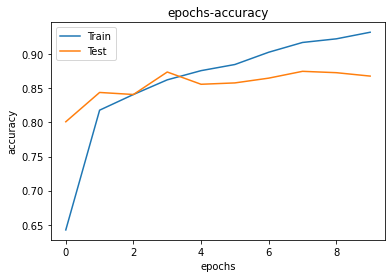

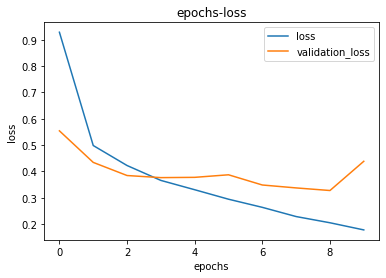

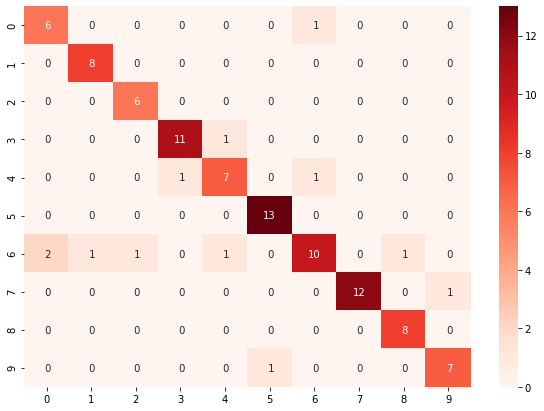

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.89      0.94         9
           2       1.00      0.86      0.92         7
           3       0.92      0.92      0.92        12
           4       0.78      0.78      0.78         9
           5       1.00      0.93      0.96        14
           6       0.62      0.83      0.71        12
           7       0.92      1.00      0.96        12
           8       1.00      0.89      0.94         9
           9       0.88      0.88      0.88         8

    accuracy                           0.88       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.89      0.88      0.88       100



In [125]:
random_state = 60

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_num = len(class_names)

(x_train, y_train), (x_test, y_test) = load_data()


x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=random_state)
vertification_train, x_test, vertification_test, y_test = train_test_split(x_test, y_test, test_size=0.1, random_state=random_state)
_, vertification_train, _, vertification_test = train_test_split(vertification_train, vertification_test, test_size=100, random_state=random_state)

# (28,28)ではVGG16で学習できないので、(64,64)に変換
x_train = img_reshape(x_train)
x_test = img_reshape(x_test)
vertification_train = img_reshape(vertification_train)

x_train = data_reshape(x_train)
x_test = data_reshape(x_test)
vertification_train = data_reshape(vertification_train)

# one-hot表現に変換
y_train = to_categorical( y_train, class_num )
y_test = to_categorical( y_test, class_num )
vertification_test = to_categorical( vertification_test, class_num )

def create_model(class_num):
    input_tensor = Input( shape=(64, 64, 1) )
    vgg = VGG16( include_top=False, input_tensor=input_tensor, weights=None )
    x = vgg.output
    x = Flatten()(x)
    x = Dense(class_num, activation="softmax")(x)
    return Model( inputs=vgg.inputs, outputs=x )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/vgg16-data=6000-epochs=10-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/vgg16-data=6000-epochs=10.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 64, 64, 1)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)     

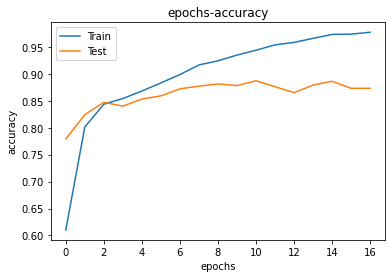

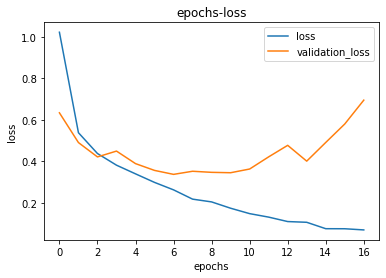

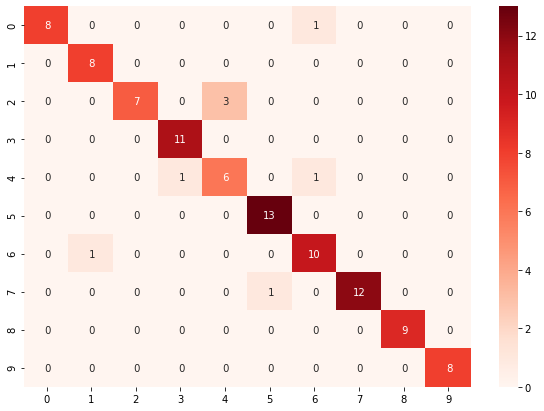

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.89      0.94         9
           2       0.70      1.00      0.82         7
           3       1.00      0.92      0.96        12
           4       0.75      0.67      0.71         9
           5       1.00      0.93      0.96        14
           6       0.91      0.83      0.87        12
           7       0.92      1.00      0.96        12
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         8

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100



In [124]:
random_state = 60

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_num = len(class_names)

(x_train, y_train), (x_test, y_test) = load_data()


x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=random_state)
vertification_train, x_test, vertification_test, y_test = train_test_split(x_test, y_test, test_size=0.1, random_state=random_state)
_, vertification_train, _, vertification_test = train_test_split(vertification_train, vertification_test, test_size=100, random_state=random_state)

# (28,28)ではVGG16で学習できないので、(64,64)に変換
x_train = img_reshape(x_train)
x_test = img_reshape(x_test)
vertification_train = img_reshape(vertification_train)

x_train = data_reshape(x_train)
x_test = data_reshape(x_test)
vertification_train = data_reshape(vertification_train)

# one-hot表現に変換
y_train = to_categorical( y_train, class_num )
y_test = to_categorical( y_test, class_num )
vertification_test = to_categorical( vertification_test, class_num )

def create_model(class_num):
    input_tensor = Input( shape=(64, 64, 1) )
    vgg = VGG16( include_top=False, input_tensor=input_tensor, weights=None )
    x = vgg.output
    x = Flatten()(x)
    x = Dense(class_num, activation="softmax")(x)
    return Model( inputs=vgg.inputs, outputs=x )

model = create_model(class_num)
model.summary()

model.load_weights('./Results/NN/weights/vgg16-data=6000-epochs=17-weights.h5')
model.compile(optimizer=Adam( learning_rate=1e-4 ), loss='categorical_crossentropy', metrics=['accuracy'])

hist = read_pkl('./Results/NN/history/vgg16-data=6000-epochs=17.pkl')

# 学習による正解率,損失関数の値の推移のグラフを出力
plot_acc( hist["accuracy"], hist["val_accuracy"] )
plot_loss( hist["loss"], hist["val_loss"] )

# モデルによる予測データを取得
predict = model.predict(vertification_train)

# モデルの予測で最も可能性が高いクラスのインデックス番号のリストを取得
predict_index = most_likely_index(predict)
true_class = most_likely_index(vertification_test)

# 混同行列のヒートマップを出力
matrix = confusion_matrix(predict_index, true_class)
heat_map(matrix)

# 適合率, 再現率, F値, 正解率, マクロ平均, マイクロ平均を出力
print(classification_report(true_class, predict_index))